# **Final Project:  Online Shoppers Intent to Buy**



# **Introduction to the Data**


This project focuses on developing a predictive model for online shopping behavior using a dataset containing 18 features obtained from customers' browsers and website interactions. The dataset, sourced from the UCI Machine Learning Repository, includes 12,330 samples with a mix of 10 numerical and 8 categorical attributes. The goal is to analyze the data and build a reliable model that can accurately predict purchasing decisions of online shoppers based on their interactions with the website. The main task of this project is to apply different ML methods to this data to determine which classification model is best for prediction. 

In [307]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn import model_selection
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix


#**Data Fetching and Data Cleaning**

In [318]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv') 

df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [319]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

As we can see here, not all the features are in numerical form. Let's keep this in mind so we can fix it before modeling our data later.

In [320]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

No null values in  this dataset, great!

In [321]:
duplicates = df.duplicated().sum()
print(duplicates)

125


Checking for duplicates, 125 found.

In [322]:
df = df[~df.duplicated()]

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType           

Remove duplicates from dataset so that there is now 12205 as compared to 12330 entries before.

There are no null values in this dataset.

In [323]:
df.shape

(12205, 18)

End result after taking our data in and cleaning it up a bit. All in all, it wasn't too messy in the first place, so wasn't too bad.

# **EDA (Exploratory Data Analysis)**

In [324]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000
mean,2.338878,81.646331,0.508726,34.825454,32.045637,1206.982457,0.020370,0.041466,5.949574,0.061942,2.124211,2.357804,3.153298,4.073904
std,3.330436,177.491845,1.275617,141.424807,44.593649,1919.601400,0.045255,0.046163,18.653671,0.199666,0.906823,1.710114,2.402340,4.016654
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,193.000000,0.000000,0.014231,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.942857,0.002899,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,94.700000,0.000000,0.000000,38.000000,1477.154762,0.016667,0.048529,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


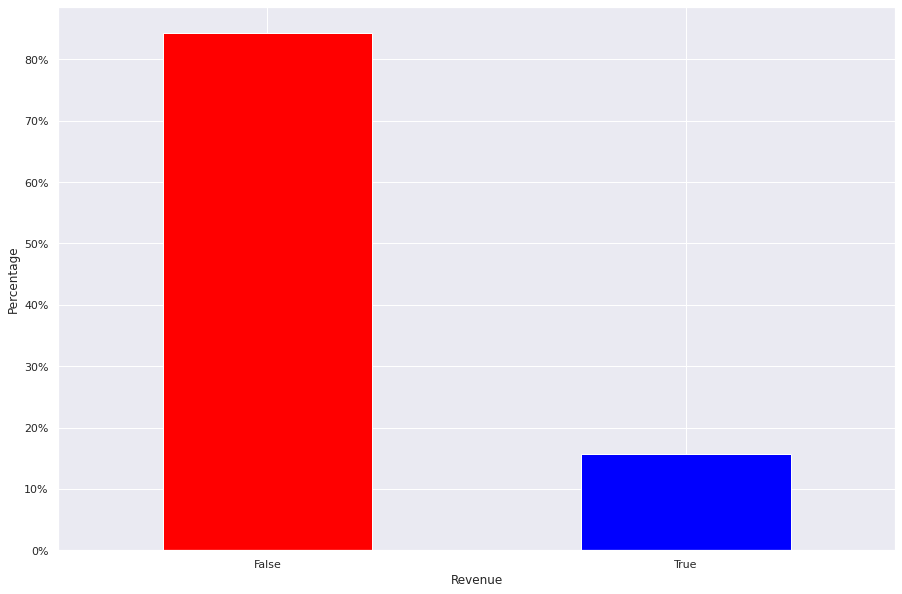

Revenue
False    84.367063
True     15.632937
dtype: float64


In [215]:
percentages = df.groupby('Revenue').size() / len(df) * 100

# Create the bar chart below with the percentage values
ax = percentages.plot(kind='bar', color=['red', 'blue'])
ax.set_ylabel('Percentage')
ax.set_xticklabels(['False', 'True'], rotation=0)
ax.yaxis.set_major_formatter('{x:.0f}%')
plt.show()

print(percentages)

As you can see in the bar chart above, the rounded percentages of values is for revenue is 84% and 16% respectively. This means that for every 100 customers that begin a session on the webpage, 15 of them end the session with a purchase.

In [216]:
df.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.600457,0.375256,0.254813,0.428305,0.371146,-0.213096,-0.311255,0.097017,-0.096951,-0.006586,-0.025622,-0.007262,-0.034643,0.023825,0.136330
Administrative_Duration,0.600457,1.000000,0.301419,0.237211,0.286863,0.353583,-0.136913,-0.201971,0.066228,-0.074666,-0.007529,-0.015742,-0.006729,-0.014991,0.013259,0.091768
Informational,0.375256,0.301419,1.000000,0.618648,0.372572,0.386052,-0.109095,-0.159429,0.047406,-0.049350,-0.009721,-0.038787,-0.030317,-0.035197,0.034359,0.093626
Informational_Duration,0.254813,0.237211,0.618648,1.000000,0.279082,0.346596,-0.069878,-0.102852,0.030090,-0.031261,-0.009734,-0.019573,-0.027891,-0.025126,0.023193,0.069358
ProductRelated,0.428305,0.286863,0.372572,0.279082,1.000000,0.860330,-0.192884,-0.286082,0.054201,-0.025839,0.004194,-0.013586,-0.040108,-0.044223,0.013477,0.156042
ProductRelated_Duration,0.371146,0.353583,0.386052,0.346596,0.860330,1.000000,-0.173829,-0.245265,0.050923,-0.038122,0.002870,-0.007724,-0.034869,-0.037390,0.004903,0.150077
BounceRates,-0.213096,-0.136913,-0.109095,-0.069878,-0.192884,-0.173829,1.000000,0.902144,-0.115799,0.088626,0.026811,-0.015501,0.002787,0.089184,-0.034808,-0.145091
ExitRates,-0.311255,-0.201971,-0.159429,-0.102852,-0.286082,-0.245265,0.902144,1.000000,-0.173627,0.117176,0.016345,-0.003323,-0.000987,0.087478,-0.053061,-0.204320
PageValues,0.097017,0.066228,0.047406,0.030090,0.054201,0.050923,-0.115799,-0.173627,1.000000,-0.064481,0.018632,0.045908,0.010588,0.012286,0.010801,0.491894
SpecialDay,-0.096951,-0.074666,-0.049350,-0.031261,-0.025839,-0.038122,0.088626,0.117176,-0.064481,1.000000,0.012806,0.003528,-0.016450,0.052856,-0.017723,-0.083601


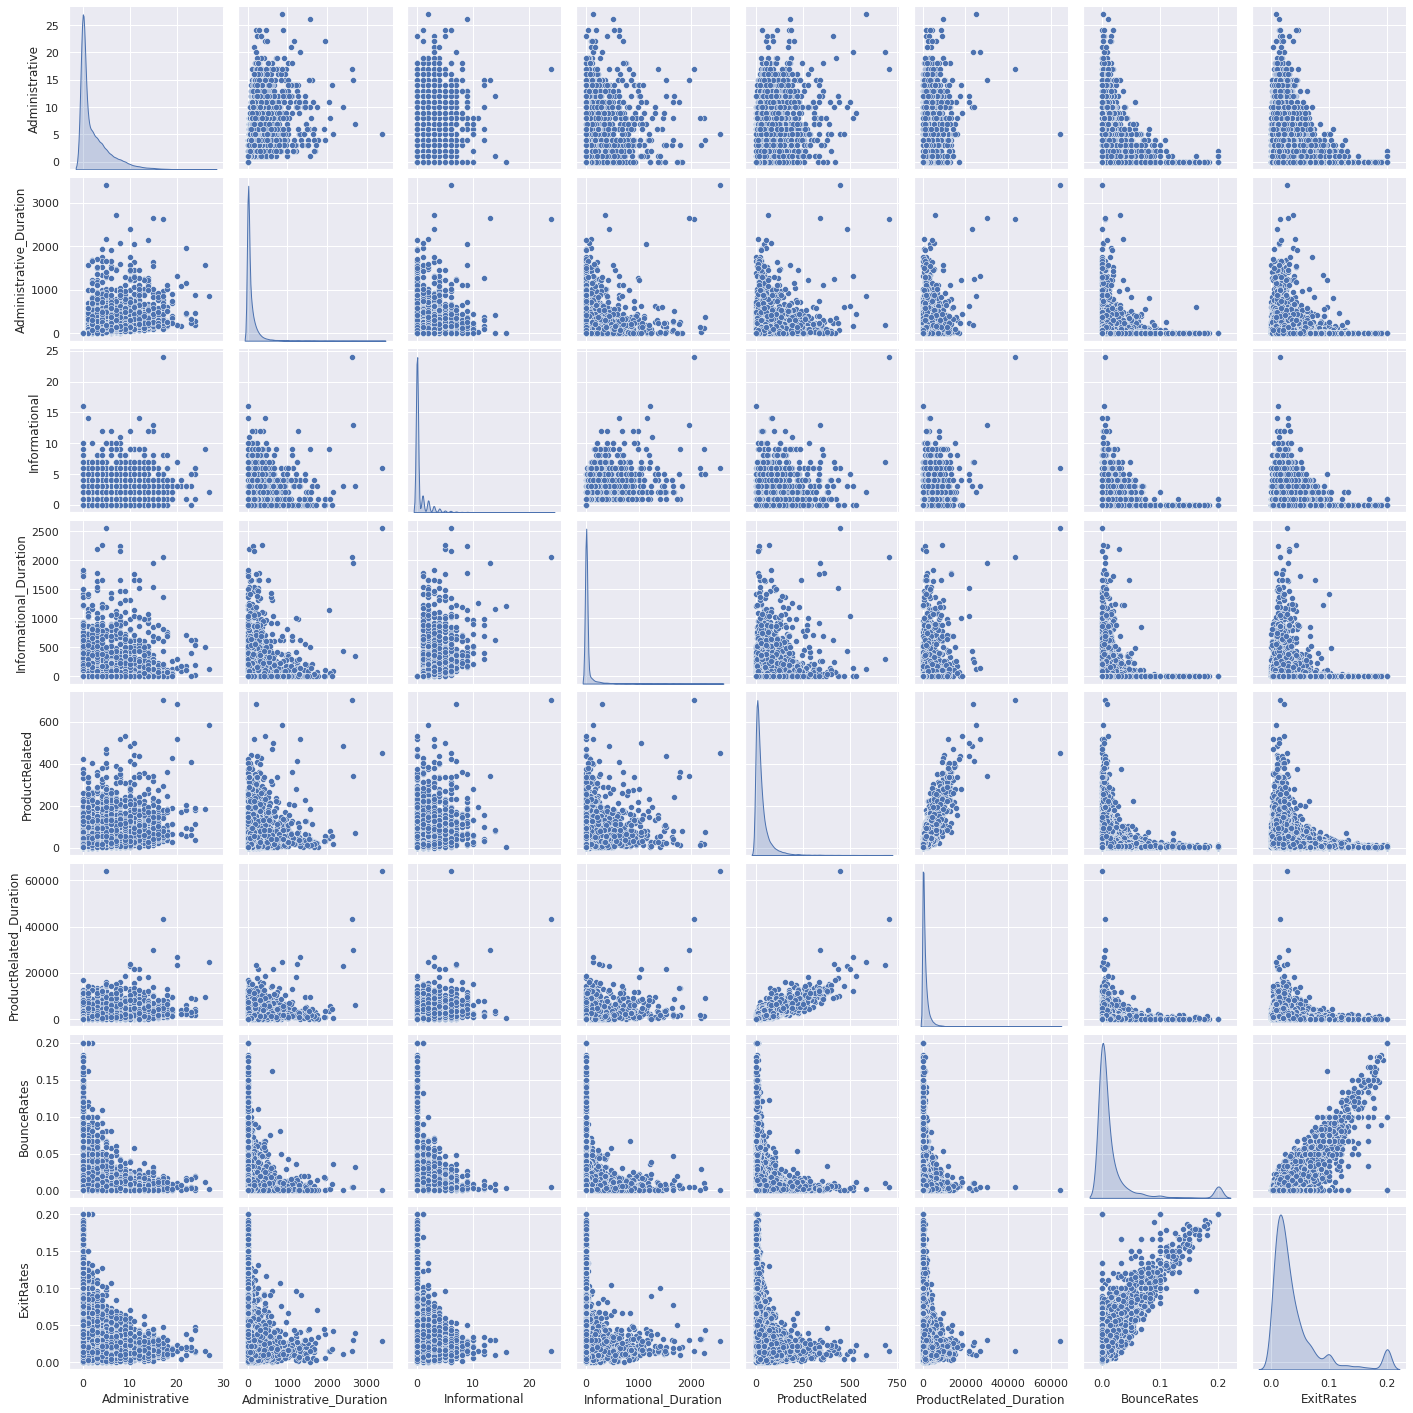

In [279]:
cols = list(df.columns[:8])

sns.pairplot(df[cols], diag_kind='kde')

<AxesSubplot:>

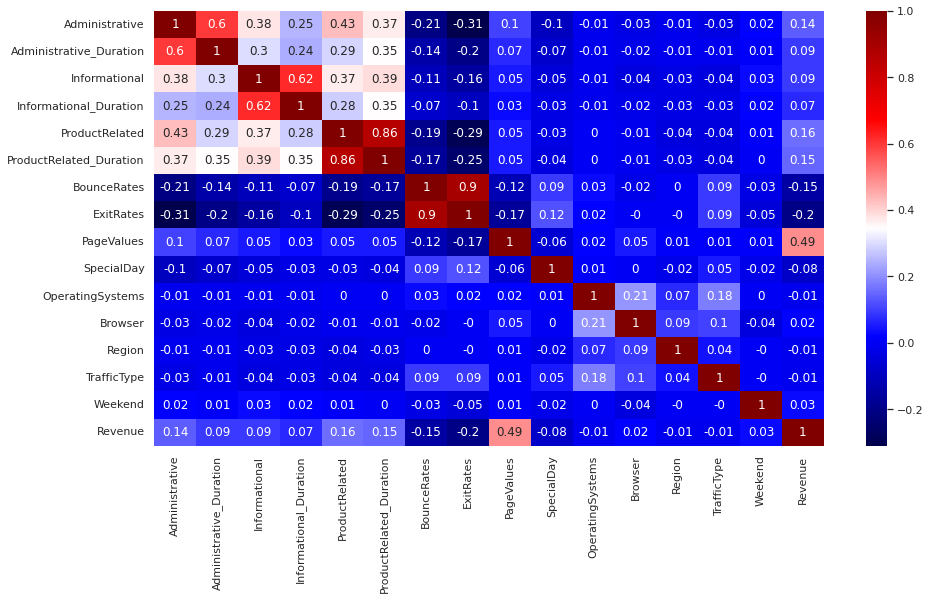

In [217]:

sns.set(rc={'figure.figsize': (15, 8)})
sns.heatmap(df.corr().round(decimals=2,), annot=True, cmap='seismic',)



From this heatmap, we can see that a lot of the attributes of this dataset are not very correlated, but we can see that revenue (which determines if the user bought something or not) is correlated to the PageValues attribute. This will be useful later.

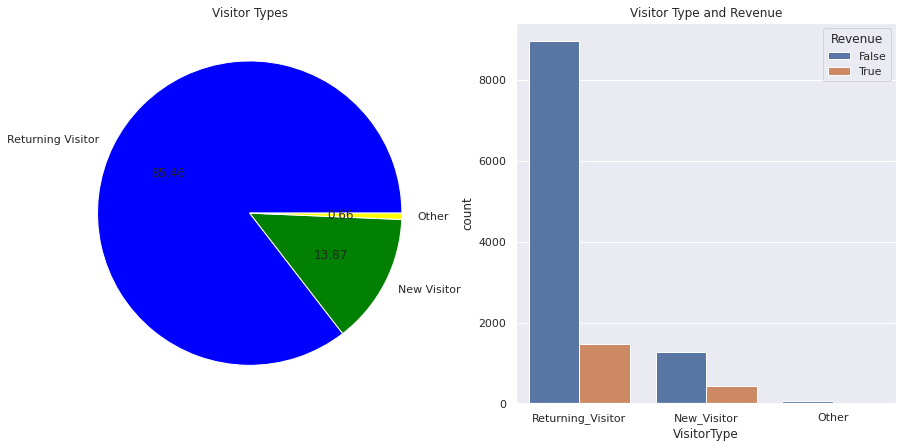

In [218]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))


axes[0].set_title('Visitor Types')
axes[0].pie(x=df['VisitorType'].value_counts(),
            labels=['Returning Visitor', 'New Visitor', 'Other'],
            autopct='%.2f',
            colors=['blue', 'green', 'yellow'])


axes[1].set_title('Visitor Type and Revenue')
sns.countplot(x='VisitorType', hue='Revenue', data=df, palette='deep', ax=axes[1])

# Show the plot
plt.show()

From the above, we can see that most visitors are returning ones, and in the figure to the right of that one, we can see that returning visitors do not end up buying something, but new visitors are.

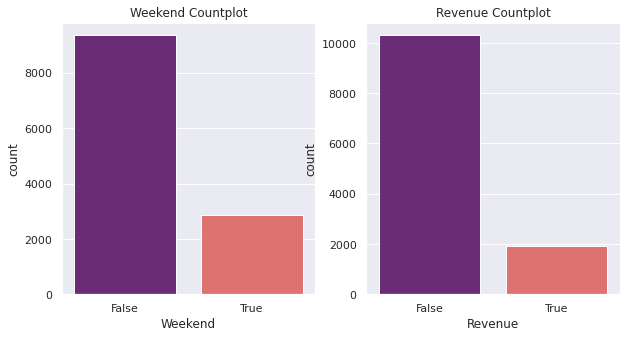

In [219]:

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.set_theme(style="whitegrid")
sns.countplot(x='Weekend', data=df, palette='magma', ax=axes[0])
axes[0].set_title('Weekend Countplot')

sns.set_theme(style="darkgrid")
sns.countplot(x='Revenue', data=df, palette='magma', ax=axes[1])
axes[1].set_title('Revenue Countplot')

plt.show()



In the above figure, it can be deduced that most users shop on the weekends as opposed to the weekends. (Maybe it's the people who are bored at home or at school)

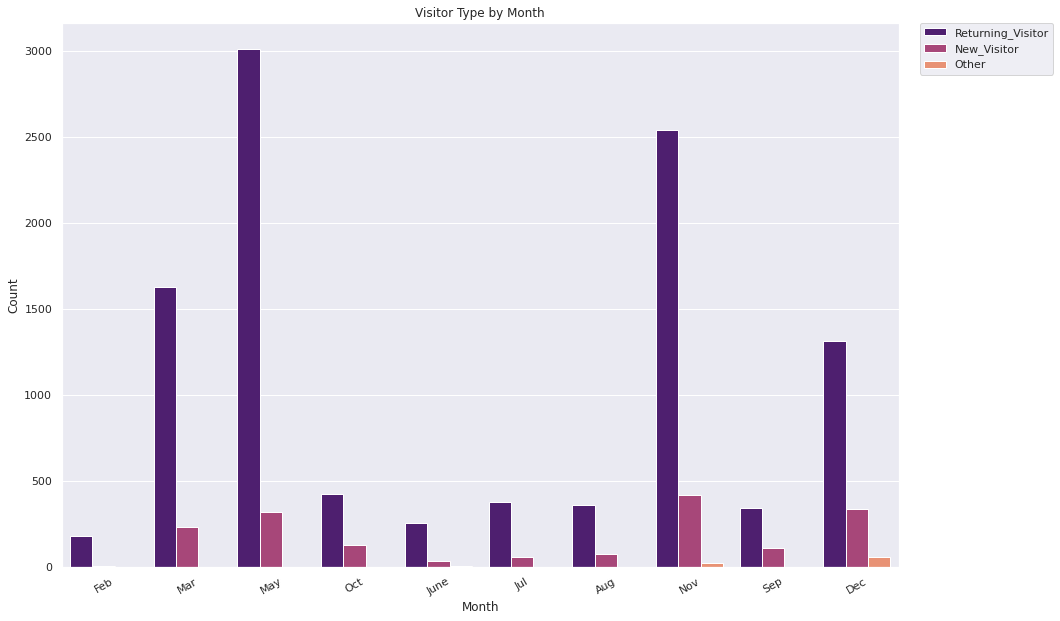

In [220]:
sns.set(font_scale=1.5, rc={'figure.figsize':(15,10)})

sns.set_theme(style="darkgrid")
ax = sns.countplot(x ='Month', data = df, hue=df['VisitorType'], palette='magma')
ax.set_title('Visitor Type by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

plt.legend(bbox_to_anchor=(1.025, 1), loc=2, borderaxespad=0.)



From this plot, we can see that the month with the highest number of returning visitors is May, while the month with the highest number of new visitors is November.

Text(0, 0.5, 'Page Values')

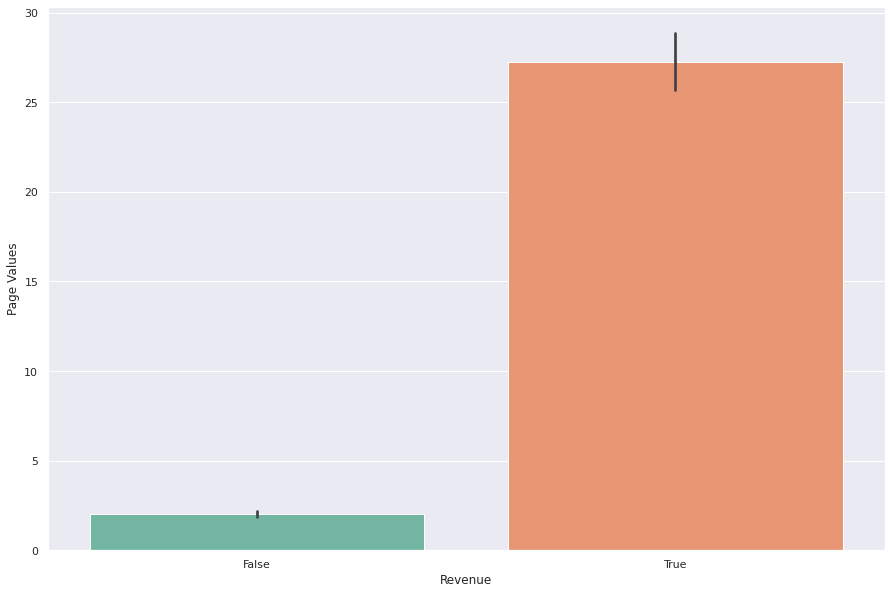

In [221]:
sns.barplot(x='Revenue', y='PageValues', data=df, palette='Set2')
plt.xlabel('Revenue')
plt.ylabel('Page Values')


In the figure above, we can see that the higher the PageValues value is, the more likely that the user is to buy something. This works with what we saw earlier in our correlation heatmap.

# Data Prediction Modelling 

In [260]:
most_imp = pd.Series(mutual_info_classif(df.drop('Revenue', axis=1), df['Revenue']) * 100,
                     index=df.drop('Revenue', axis=1).columns)

most_imp = most_imp.sort_values(ascending=False)

print(most_imp)

PageValues                 16.377522
ExitRates                   4.319990
ProductRelated_Duration     3.163708
BounceRates                 2.596853
ProductRelated              2.212452
Administrative              1.787718
Month                       1.631934
Administrative_Duration     1.269705
TrafficType                 1.184267
VisitorType                 0.640976
SpecialDay                  0.547901
Informational_Duration      0.333761
OperatingSystems            0.070899
Browser                     0.038126
Informational               0.000000
Region                      0.000000
Weekend                     0.000000
dtype: float64


Above, we can see that in order from top to bottom, PageValues is the most important feature, followed by ExitRates, and ProductRelated_Duration.

In [223]:
#Creating a new dataframe for training/testing.

df2 = df

df2['Weekend'] = df2['Weekend'].astype(int)
df2['Revenue'] = df2['Revenue'].astype(int)

df2['VisitorType'] = df2['VisitorType'].replace({'Returning_Visitor': 0, 'New_Visitor': 1, 'Other': 2}).astype(int)

df2['Month'] = df2['Month'].replace({'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}).astype(int)



In [228]:
X = df2.drop(columns='Revenue')
y = df2['Revenue'] 

X.shape, y.shape

((12205, 17), (12205,))

In [186]:
sm = SMOTE(random_state = 3)
X_train_x, y_train_y = sm.fit_resample(X,y.ravel())

Since the dataset is heavily skewed because of the 'Revenue' feature, it imbalances the dataset, which may make classifiers predict wrong in favor of false because it results in higher accuracy. Because of this, oversampling the training data above is a good choice.

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X_train_x, y_train_y, test_size =0.20,random_state=87)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16475, 17), (16475,), (4119, 17), (4119,))

Splitting the data into 80/20 split for training and test data.

In [311]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

rfc_train = rfc.score(X_train, y_train)
rfc_test = rfc.score(X_test,y_test)

print('Random Forest Classifier Train Accuracy:', rfc_train)
print('Random Forest Classifier Test Accuracy:', rfc_test)

Random Forest Classifier Train Accuracy: 1.0
Random Forest Classifier Test Accuracy: 0.9291090070405438


In [305]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)



knn_train = KNN.score(X_train, y_train)
knn_test = KNN.score(X_test,y_test)

print('KNeighborsClassifier Train Accuracy:', knn_train)
print('KNeighborsClassifier Test Accuracy:', knn_test)

KNeighborsClassifier Train Accuracy: 0.9351745068285281
KNeighborsClassifier Test Accuracy: 0.8820101966496723


In [306]:
svc = SVC()
svc.fit(X_train, y_train)
svc_train = svc.score(X_train, y_train)
svc_test = svc.score(X_test, y_test)

print('SVC Train Accuracy:', svc_train)
print('SVC Test Accuracy:', svc_test)

SVC Train Accuracy: 0.7318361153262519
SVC Test Accuracy: 0.7227482398640447


In [283]:
df_cluster = df2


scaler = StandardScaler()

df_cluster_scaled = scaler.fit_transform(df_cluster)


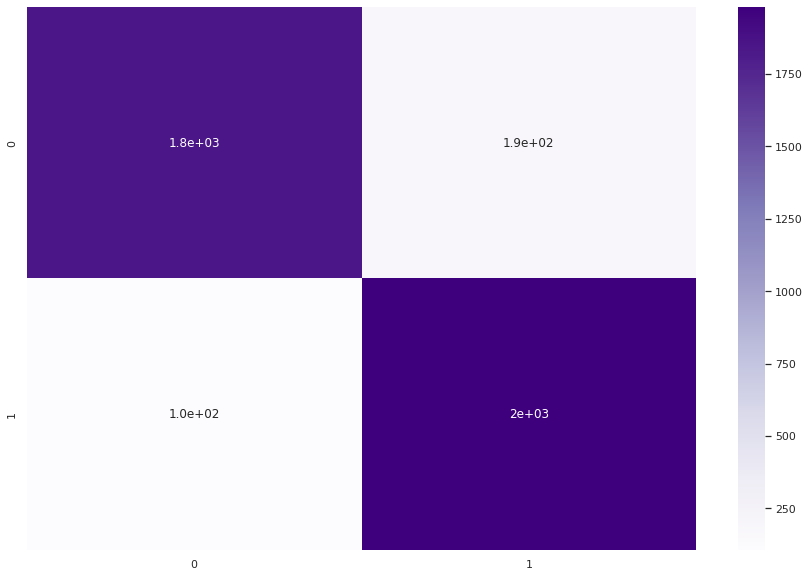

In [317]:
y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Purples')
plt.show()

Heatmap prediction model based off of results from the RandomForestClassifier classifier.

# Results & Analysis



In [303]:
d = {'classifiers':['RFC', 'SVC', 'KNN'],'train':[rfc_train, svc_train, knn_train], 'test':[rfc_test, svc_test, knn_test]}
 
tt_test = pd.DataFrame(d)

tt_frm = tt_test.style \
    .format({'train': '{:.2%}', 'test': '{:.2%}'}) \
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'left')]}]) \
    .set_properties(**{'text-align': 'center'})

# Displays dataframe
display(tt_frm)

,classifiers,train,test
0,RFC,100.00%,92.89%
1,SVC,73.18%,72.27%
2,KNN,93.52%,88.20%


In the above train/test dataframe, we can see that the RFC (RandomForestClassifier) prediction came out with the best results, at almost 93% accuracy. As opposed to the SVC model, which came out to about 72% for the test. KNN is in the middle in terms of perfomance.

# Conclusion

This project delves into the prediction of consumer purchasing decisions based on all the different attributes (17 total) using a well-structured real-world dataset. The analysis provides valuable insights into customer behavior from both commercial and technical perspectives. Through exploratory data analysis and our Random Forest model, we found that the assumption that the "Weekend" attribute has a strong correlation on purchasing decisions due to having more free time on weekends is inaccurate. Instead, our results suggest that the timing of the purchase may be more critical than the day of the week. As different months, such as May and November, have higher counts of customers involved in purchases. One thing I would do to improve would be making a more intricate kmeans cluster graph.